# Библиотеки

In [231]:
import os
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

# Полный CSV  

In [234]:
metadata_dir = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_json"

files = [f for f in os.listdir(metadata_dir) if f.endswith(".json")]
rows = []

for file in tqdm(files):
    path = os.path.join(metadata_dir, file)
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
        
    row = {
        "id": data.get("id"),
        "name": data.get("name"),
        "duration": data.get("duration"),
        "artist_id": data.get("artist_id"),
        "artist_name": data.get("artist_name"),
        "album_id": data.get("album_id"),
        "album_name": data.get("album_name"),
        "releasedate": data.get("releasedate"),
    }

    mi = data.get("musicinfo", {})
    row["lang"] = mi.get("lang")
    row["vocalinstrumental"] = mi.get("vocalinstrumental")
    row["gender"] = mi.get("gender")
    row["acousticelectric"] = mi.get("acousticelectric")
    row["speed"] = mi.get("speed")

    tags = mi.get("tags", {})
    row["genres"] = ", ".join(tags.get("genres", []))
    row["instruments"] = ", ".join(tags.get("instruments", []))
    row["vartags"] = ", ".join(tags.get("vartags", []))

    st = data.get("stats", {})
    row["rate_downloads_total"] = st.get("rate_downloads_total")
    row["rate_listened_total"] = st.get("rate_listened_total")
    row["playlisted"] = st.get("playlisted")
    row["favorited"] = st.get("favorited")
    row["likes"] = st.get("likes")
    row["dislikes"] = st.get("dislikes")
    row["avgnote"] = st.get("avgnote")

    rows.append(row)

df = pd.DataFrame(rows)

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_full.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")

100%|████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 5689.22it/s]


# Проверки

In [237]:
display(df.head()) 

,id,name,duration,artist_id,artist_name,album_id,album_name,releasedate,lang,vocalinstrumental,...,genres,instruments,vartags,rate_downloads_total,rate_listened_total,playlisted,favorited,likes,dislikes,avgnote
0,1000957,Key to Success - Discover the Possibility,170,375935,Akashic Records,117782,Corporate Presentation - Key To Success,2013-01-20,,instrumental,...,"corporate, filmscore, poprock","guitar, strings","motivational, happy, film",136505,598523,1999,843,27,1,8.2857
1,1001519,In Your Face,201,1333,Brad Sucks,117853,Guess Who's a Mess,2013-01-22,,vocal,...,,,,91080,518129,270,151,20,1,8.6667
2,1002052,Feel Good Acoustic Ukulele,213,375935,Akashic Records,117912,Optimistic Acoustic Ukulele,2013-01-23,,instrumental,...,"pop, folk, filmscore","strings, ukulele","happy, advertising, peaceful",123720,406731,1490,744,78,1,8.9231
3,1007842,Heaven by Bruno Susio (feat. Marie Louise Frif...,263,365833,Jazz Friends,118676,Jazz Friends 2013 - Guitars in Jazz,2013-02-14,,vocal,...,jazz,"drums, electricguitar","vocal, upbeat, voice, loungejazz",15935,186017,81,29,6,0,8.0000
4,1007988,Do or Die,240,367351,Fall Walk Run,118643,Piece By Piece,2013-02-12,,vocal,...,rock,,"vocal, voice",195521,732900,626,338,73,4,8.3333


In [239]:
df[df["id"] == '1157362']

,id,name,duration,artist_id,artist_name,album_id,album_name,releasedate,lang,vocalinstrumental,...,genres,instruments,vartags,rate_downloads_total,rate_listened_total,playlisted,favorited,likes,dislikes,avgnote
274,1157362,First,204,440692,JekK,138887,Dear Dreams,2014-09-28,en,vocal,...,"dance, edm","synthesizer, piano","happy, energetic, advertising, voice",3639776,6961521,6308,3986,220,12,9.8667


In [241]:
df.nunique()

id                      2001
name                    1959
duration                 333
artist_id                669
artist_name              668
album_id                1065
album_name              1055
releasedate              946
lang                       9
vocalinstrumental          3
gender                     4
acousticelectric           3
speed                      6
genres                   785
instruments              222
vartags                 1069
rate_downloads_total    1978
rate_listened_total     1998
playlisted              1237
favorited               1005
likes                    113
dislikes                  19
avgnote                   96
dtype: int64

# Сэмпл 250 треков, охватывающий все существующие комбинации значений в колонках: 'lang', 'vocalinstrumental', 'gender', 'acousticelectric', 'speed' и 'instruments'


In [244]:
cols = ['lang', 'vocalinstrumental', 'gender', 'acousticelectric', 'speed', 'instruments']

frames = []
for col in cols:
    unique_vals = df[col].unique()
    for val in unique_vals:
        sample_row = df[df[col] == val].head(1)
        frames.append(sample_row)

df_repr = pd.concat(frames).drop_duplicates().reset_index(drop=True)


add_rows = df.sample(250 - len(df_repr)+6, random_state=250)
df_repr = pd.concat([df_repr, add_rows]).drop_duplicates().head(250).reset_index(drop=True)

print("Количество уникальных значений по колонкам:")
print(df_repr[cols].nunique())
display(df_repr)

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_sample_250.csv"
df_repr.to_csv(out_path, index=False, encoding="utf-8-sig")

Количество уникальных значений по колонкам:
lang                   9
vocalinstrumental      3
gender                 4
acousticelectric       3
speed                  6
instruments          222
dtype: int64


,id,name,duration,artist_id,artist_name,album_id,album_name,releasedate,lang,vocalinstrumental,...,genres,instruments,vartags,rate_downloads_total,rate_listened_total,playlisted,favorited,likes,dislikes,avgnote
0,1000957,Key to Success - Discover the Possibility,170,375935,Akashic Records,117782,Corporate Presentation - Key To Success,2013-01-20,,instrumental,...,"corporate, filmscore, poprock","guitar, strings","motivational, happy, film",136505,598523,1999,843,27,1,8.2857
1,1009673,Endless Hours,168,7063,Fresh Body Shop,118858,Wizard,2013-02-19,en,vocal,...,"rock, pop",,"acoustic, vocal, voice, neutral",10463,688604,162,74,5,1,8.0000
2,1014954,Qué Pasó,217,358187,Sundayers,119528,Impulsos,2013-03-12,es,vocal,...,"reggae, rock",,"vocal, happy, voice",29812,223571,270,152,1,0,8.0000
3,1027698,La Scelta del Presidente,197,351372,Millionaire Blonde,120852,La Scelta del Presidente,2013-04-19,it,vocal,...,"pop, electronic, electropop","synthesizer, violin","energetic, acoustic, vocal, voice",331754,1616864,440,221,55,3,8.0357
4,10558,A l’orée d’un siècle en bois,235,14,David TMX,1561,A l'orée d'un siecle en bois,2006-03-29,fr,vocal,...,metal,,"acoustic, vocal, voice, neutral",9205,44769,1744,1540,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,35349,do it over,184,4927,amélie,4301,be low,2007-02-12,en,vocal,...,"pop, rock",,"acoustic, vocal, voice",107347,1070584,2220,828,9,1,7.2500
246,15664,Headphonetic,396,2278,Revolution Void,2225,Increase the Dosage,2006-06-20,,instrumental,...,"ambient, electronic, downtempo",saxophone,"psychedelic, soft, peaceful",51787,572962,4197,3158,5,1,8.6667
247,537123,¿Quién Debe a Quién?,249,358187,Sundayers,62611,Cógelo!,2010-03-05,es,vocal,...,"reggae, rock",,"acoustic, vocal, voice",10814,160642,393,232,0,0,9.0000
248,1159406,Spark,224,444388,Final Round,139192,It Ends with Us Both Right Here EP,2014-10-10,,vocal,...,"rock, poppunk","electricguitar, drums","energetic, vocal, fast, voice",130469,335578,617,338,53,4,8.6667


# CSV с фичами

#### Z-преобразование

In [248]:
numeric_cols = ['duration', 'rate_downloads_total',	'rate_listened_total', 'playlisted', 'favorited', 'likes', 'dislikes', 'avgnote']

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

display(df_scaled[numeric_cols].describe().round(2))

,duration,rate_downloads_total,rate_listened_total,playlisted,favorited,likes,dislikes,avgnote
count,2001.00,2001.00,2001.00,2001.00,2001.00,2001.00,2001.00,2001.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.06,-0.21,-0.65,-0.76,-0.71,-0.39,-0.40,-3.91
25%,-0.59,-0.19,-0.41,-0.61,-0.60,-0.39,-0.40,-0.05
50%,-0.14,-0.16,-0.21,-0.39,-0.40,-0.25,-0.40,0.21
75%,0.42,-0.08,0.11,0.25,0.16,-0.05,0.10,0.43
max,12.66,26.24,24.42,6.57,5.70,15.83,12.99,1.24


#### Максимум большинства колонок слишком большой, можно прибегнуть к их логарифмированию

#### Z-преобразование с логарифмированием (для снижения веса больших разрывов)

In [251]:
df_scaled = df.copy()

cols_to_log = ["duration", "rate_downloads_total", "rate_listened_total", "likes", "dislikes"]

for col in cols_to_log:
    df_scaled[col + "_log"] = np.log1p(df_scaled[col])

numeric_cols = [col + "_log" for col in cols_to_log] + ["playlisted", "favorited", "avgnote"]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled[numeric_cols])

scaled_cols = [col + "_scaled" for col in numeric_cols]
df_scaled[scaled_cols] = scaled_values

display(df_scaled[scaled_cols].describe().round(2))

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_only_scaled_features.csv"
df_scaled[scaled_cols].to_csv(out_path, index=False, encoding="utf-8-sig")

df_scaled = df_scaled.drop(df_scaled.columns[23:28], axis=1)
display(df_scaled[scaled_cols])

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_with_scaled_features.csv"
df_scaled.to_csv(out_path, index=False, encoding="utf-8-sig")

,duration_log_scaled,rate_downloads_total_log_scaled,rate_listened_total_log_scaled,likes_log_scaled,dislikes_log_scaled,playlisted_scaled,favorited_scaled,avgnote_scaled
count,2001.00,2001.00,2001.00,2001.00,2001.00,2001.00,2001.00,2001.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-12.70,-2.21,-3.67,-1.23,-0.60,-0.76,-0.71,-3.91
25%,-0.55,-0.74,-0.55,-1.23,-0.60,-0.61,-0.60,-0.05
50%,-0.01,-0.12,0.06,0.03,-0.60,-0.39,-0.40,0.21
75%,0.57,0.62,0.61,0.65,0.60,0.25,0.16,0.43
max,5.54,4.59,4.20,3.59,5.14,6.57,5.70,1.24


,duration_log_scaled,rate_downloads_total_log_scaled,rate_listened_total_log_scaled,likes_log_scaled,dislikes_log_scaled,playlisted_scaled,favorited_scaled,avgnote_scaled
0,-0.938840,0.956250,0.369607,1.381203,0.595957,0.678478,0.157961,0.356487
1,-0.384126,0.650429,0.221210,1.155924,0.595957,-0.568269,-0.555240,0.552530
2,-0.191984,0.881922,-0.027839,2.193450,0.595957,0.311448,0.055928,0.684460
3,0.507128,-0.667097,-0.832697,0.295620,-0.597329,-0.704553,-0.680978,0.209480
4,0.203634,1.227820,0.577989,2.142250,2.173396,-0.311565,-0.362511,0.380979
...,...,...,...,...,...,...,...,...
1996,-1.223241,0.808178,1.279150,-0.142606,-0.597329,-0.654078,-0.621201,0.209480
1997,-0.518671,1.121424,1.757638,1.227162,0.595957,-0.608650,-0.610895,0.209480
1998,-0.025094,0.025684,1.087240,0.174907,-0.597329,-0.716812,-0.687162,0.552530
1999,0.819877,-0.855564,-0.917524,-0.142606,-0.597329,-0.685805,-0.645936,0.852665


#### OHE для колонок: "lang", "vocalinstrumental", "gender", "acousticelectric", "speed"

In [254]:
df_encoded = df_scaled.copy()

cat_cols = ["lang", "vocalinstrumental", "gender", "acousticelectric", "speed"]

df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, prefix=cat_cols)

ohe_cols = [col for col in df_encoded.columns if any(x in col for x in cat_cols)]
display(df_encoded[ohe_cols])

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_only_ohe_features.csv"
df_encoded[ohe_cols].to_csv(out_path, index=False, encoding="utf-8-sig")

,lang_,lang_de,lang_en,lang_es,lang_fr,lang_id,lang_it,lang_pt,lang_zh,vocalinstrumental_,...,gender_neutral,acousticelectric_,acousticelectric_acoustic,acousticelectric_electric,speed_,speed_high,speed_low,speed_medium,speed_veryhigh,speed_verylow
0,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1998,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1999,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


#### Подсчет количества жанров, инструментов и тегов + наличие часто встречающихся (более 100 раз)

In [257]:
import pandas as pd

df_tags = df_encoded.copy()

df_tags["genres_count"] = df_tags["genres"].apply(
    lambda x: len(str(x).split(", ")) if pd.notnull(x) else 0
)
df_tags["instruments_count"] = df_tags["instruments"].apply(
    lambda x: len(str(x).split(", ")) if pd.notnull(x) else 0
)
df_tags["vartags_count"] = df_tags["vartags"].apply(
    lambda x: len(str(x).split(", ")) if pd.notnull(x) else 0
)

def make_binary_tags(df, col, min_count=100):
    all_tags = df[col].dropna().str.split(", ").sum()
    counts = pd.Series(all_tags).value_counts()
    frequent = counts[counts >= min_count].index
    for tag in frequent:
        tag_col = f"has_{col}_{tag.replace(' ', '_')}"
        df[tag_col] = df[col].apply(lambda x: 1 if pd.notnull(x) and tag in x else 0)
    return df

for col in ["genres", "instruments", "vartags"]:
    df_tags = make_binary_tags(df_tags, col)

new_cols = [c for c in df_tags.columns if c.endswith("_count") or c.startswith("has_")]
display(df_tags[new_cols].columns)
display(df_tags[new_cols])

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_only_tag_features.csv"
df_tags[new_cols].to_csv(out_path, index=False, encoding="utf-8-sig")

Index(['genres_count', 'instruments_count', 'vartags_count', 'has_genres_pop',
       'has_genres_rock', 'has_genres_electronic', 'has_genres_jazz',
       'has_genres_', 'has_genres_indie', 'has_genres_folk',
       'has_genres_chillout', 'has_instruments_', 'has_instruments_strings',
       'has_instruments_piano', 'has_instruments_synthesizer',
       'has_instruments_guitar', 'has_instruments_drums',
       'has_instruments_electricguitar', 'has_vartags_voice',
       'has_vartags_vocal', 'has_vartags_acoustic', 'has_vartags_',
       'has_vartags_neutral', 'has_vartags_energetic', 'has_vartags_peaceful',
       'has_vartags_happy', 'has_vartags_love', 'has_vartags_upbeat'],
      dtype='object')

,genres_count,instruments_count,vartags_count,has_genres_pop,has_genres_rock,has_genres_electronic,has_genres_jazz,has_genres_,has_genres_indie,has_genres_folk,...,has_vartags_voice,has_vartags_vocal,has_vartags_acoustic,has_vartags_,has_vartags_neutral,has_vartags_energetic,has_vartags_peaceful,has_vartags_happy,has_vartags_love,has_vartags_upbeat
0,3,2,3,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2,3,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
3,1,2,4,0,0,0,1,1,0,0,...,1,1,0,1,0,0,0,0,0,1
4,1,1,2,0,1,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,3,1,1,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1997,2,1,3,1,0,1,0,1,0,0,...,1,1,1,1,0,0,0,0,0,0
1998,1,1,3,1,0,0,0,1,0,0,...,1,1,1,1,0,0,0,0,0,0
1999,1,1,3,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,1,0,0


#### Объединение в один ДФ фичей

In [260]:
features_df = pd.concat([df_scaled[scaled_cols], df_tags[new_cols], df_encoded[ohe_cols]], axis=1)
display(features_df)

out_path = r"C:\Users\vedma\OneDrive\Рабочий стол\Учеба\HSE project\downloaded_tracks\metadata\metadata_all_features.csv"
features_df.to_csv(out_path, index=False, encoding="utf-8-sig")

,duration_log_scaled,rate_downloads_total_log_scaled,rate_listened_total_log_scaled,likes_log_scaled,dislikes_log_scaled,playlisted_scaled,favorited_scaled,avgnote_scaled,genres_count,instruments_count,...,gender_neutral,acousticelectric_,acousticelectric_acoustic,acousticelectric_electric,speed_,speed_high,speed_low,speed_medium,speed_veryhigh,speed_verylow
0,-0.938840,0.956250,0.369607,1.381203,0.595957,0.678478,0.157961,0.356487,3,2,...,True,False,False,True,False,False,False,True,False,False
1,-0.384126,0.650429,0.221210,1.155924,0.595957,-0.568269,-0.555240,0.552530,1,1,...,False,True,False,False,False,False,False,True,False,False
2,-0.191984,0.881922,-0.027839,2.193450,0.595957,0.311448,0.055928,0.684460,3,2,...,True,False,False,True,False,False,False,True,False,False
3,0.507128,-0.667097,-0.832697,0.295620,-0.597329,-0.704553,-0.680978,0.209480,1,2,...,False,True,False,False,False,False,False,True,False,False
4,0.203634,1.227820,0.577989,2.142250,2.173396,-0.311565,-0.362511,0.380979,1,1,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-1.223241,0.808178,1.279150,-0.142606,-0.597329,-0.654078,-0.621201,0.209480,3,1,...,False,False,False,True,False,True,False,False,False,False
1997,-0.518671,1.121424,1.757638,1.227162,0.595957,-0.608650,-0.610895,0.209480,2,1,...,False,False,False,True,False,False,False,True,False,False
1998,-0.025094,0.025684,1.087240,0.174907,-0.597329,-0.716812,-0.687162,0.552530,1,1,...,False,False,False,True,False,False,False,True,False,False
1999,0.819877,-0.855564,-0.917524,-0.142606,-0.597329,-0.685805,-0.645936,0.852665,1,1,...,False,True,False,False,False,False,False,True,False,False


# ТОП-5 по числовым признакам

In [263]:
num_cols = ["duration", "rate_downloads_total", "rate_listened_total", "playlisted", "favorited", "likes", "dislikes", "avgnote"]

for col in num_cols:
    print(f"ПРИЗНАК --- {col.upper()}")

    df_sorted_min = df.sort_values(by=col, ascending=True)
    top5_min = df_sorted_min.head(5)

    if top5_min[col].nunique() == 1:
        val = top5_min[col].iloc[0]
        res_min = df_sorted_min[df_sorted_min[col] == val]
        print(f"Все минимальные значения")
    else:
        res_min = top5_min
        print("ТОП-5 минимальных значений:")

    display(res_min[["id", "name", "artist_name", col]])

    df_sorted_max = df.sort_values(by=col, ascending=False)
    top5_max = df_sorted_max.head(5)

    if top5_max[col].nunique() == 1:
        val = top5_max[col].iloc[0]
        res_max = df_sorted_max[df_sorted_max[col] == val]
        print(f"Все максимальные значения")
    else:
        res_max = top5_max
        print("ТОП-5 максимальных значений:")

    display(res_max[["id", "name", "artist_name", col]])

ПРИЗНАК --- DURATION
ТОП-5 минимальных значений:


,id,name,artist_name,duration
78,10579,Je m’appelle crogrignnnoncr,David TMX,4
241,1131496,Heart,Paolo Pavan,50
1786,785431,Petite chanson grivoise - INSTRUMENTAL VERSION,Löhstana David,54
1370,391008,Qualms of Conscience,Diablo Swing Orchestra,76
1915,944914,plaid shirt (revisited),Ton,82


ТОП-5 максимальных значений:


,id,name,artist_name,duration
490,1243867,"Springtime Meditation (Music for Meditation, W...",Hannes Hofkind,1196
785,1539824,Blancoz - La solita storia pt.2,Blancoz,953
1986,9884,"The Artist, The Sage, and The Jester",JT Bruce,900
1332,355479,Hand In Space,Quantum Jazz,741
505,1250829,Solar Plexus Chakra - (note E),Macroform,631


ПРИЗНАК --- RATE_DOWNLOADS_TOTAL
ТОП-5 минимальных значений:


,id,name,artist_name,rate_downloads_total
1405,425159,Yasoil,Jazz Oil,2076
75,10576,Imbroglio,David TMX,2716
1634,661634,Left,JoosTVD,2730
1911,939901,Wall #4,Basement Skylights,2850
1610,644669,The Submissive,Malika Rai,3022


ТОП-5 максимальных значений:


,id,name,artist_name,rate_downloads_total
1068,1932670,RED LIGHT,Egor Budennyy,16719048
429,1214935,Wish You Were Here,The.madpix.project,14483187
374,1204669,What Is Love,Melanie Ungar,8900915
256,1141572,Love Will Come Back Again,Chaz Robinson,7512436
228,1129271,Energy,Pokki DJ,3924453


ПРИЗНАК --- RATE_LISTENED_TOTAL
ТОП-5 минимальных значений:


,id,name,artist_name,rate_listened_total
71,10573,Tabass,David TMX,11784
75,10576,Imbroglio,David TMX,12228
74,10575,Knoklezout au taquet !,David TMX,12736
68,10570,L’homme s’enterre,David TMX,13472
77,10578,Border line,David TMX,13721


ТОП-5 максимальных значений:


,id,name,artist_name,rate_listened_total
429,1214935,Wish You Were Here,The.madpix.project,24847640
1355,381092,Ils marchent,Soul Connexion,15160551
374,1204669,What Is Love,Melanie Ungar,13718148
256,1141572,Love Will Come Back Again,Chaz Robinson,10690861
1323,35106,Afrique,Andrea Barone,8933977


ПРИЗНАК --- PLAYLISTED
ТОП-5 минимальных значений:


,id,name,artist_name,playlisted
621,1396152,Lagu_Buat_Kamu_-_Aldi_indiana_yusuf,Aldi indiana yusuf,1
785,1539824,Blancoz - La solita storia pt.2,Blancoz,2
318,1172514,09 Fubu - Entre Nos,Dj Fubu G our Fubu G,10
73,1057482,Sorry,Dayung,12
1526,548764,Fuori Posto,GUCCIO GIOVANNI,17


ТОП-5 максимальных значений:


,id,name,artist_name,playlisted
429,1214935,Wish You Were Here,The.madpix.project,10167
1214,26736,Struttin',Tryad,8831
1364,391002,Balrog Boogie,Diablo Swing Orchestra,8598
1215,26737,Breathe,Tryad,8411
1220,26742,Beauty,Tryad,7962


ПРИЗНАК --- FAVORITED
ТОП-5 минимальных значений:


,id,name,artist_name,favorited
621,1396152,Lagu_Buat_Kamu_-_Aldi_indiana_yusuf,Aldi indiana yusuf,0
785,1539824,Blancoz - La solita storia pt.2,Blancoz,1
318,1172514,09 Fubu - Entre Nos,Dj Fubu G our Fubu G,2
1836,856526,Musica,Fabrizio Ciccarelli,4
1526,548764,Fuori Posto,GUCCIO GIOVANNI,4


ТОП-5 максимальных значений:


,id,name,artist_name,favorited
429,1214935,Wish You Were Here,The.madpix.project,6221
1214,26736,Struttin',Tryad,5745
1215,26737,Breathe,Tryad,5621
1225,26747,Waltz Into the Moonlight,Tryad,5513
1220,26742,Beauty,Tryad,5500


ПРИЗНАК --- LIKES
Все минимальные значения


,id,name,artist_name,likes
1000,1846022,Sax Is My Cardio,Kuzinmuzin,0
519,1278619,Beat n°1,Prysm,0
942,1766006,Through My Eyes (Gemini),RENAE,0
941,1765026,Head Over Heels,The Devil Music Co.,0
940,1765024,Blood,All My Friends Hate Me,0
...,...,...,...,...
1276,308260,My Will,Vians,0
1292,3276,Oia,Manuzik,0
1912,941038,Akusmatic - Lapislazuli,AKUSMATiC,0
1911,939901,Wall #4,Basement Skylights,0


ТОП-5 максимальных значений:


,id,name,artist_name,likes
153,1099703,Divergence (Remastered VIP),TheBlackParrot,471
219,1122085,Sweet,Tamara Laurel,394
132,1092425,April Showers,ProleteR,392
228,1129271,Energy,Pokki DJ,326
146,1093987,Sweet,Tamara Laurel,295


ПРИЗНАК --- DISLIKES
Все минимальные значения


,id,name,artist_name,dislikes
1000,1846022,Sax Is My Cardio,Kuzinmuzin,0
1132,2137882,Bad Intentions,Bessonn&amp;sa,0
1131,2135375,LEEONA - Do I,Zara Arshakian,0
1130,2135373,LEEONA - Taste,Zara Arshakian,0
1129,210915,Out of It,Brad Sucks,0
...,...,...,...,...
572,1329500,Three Kisses,Jake Gordon,0
666,142729,8 - I Need,Akh-Point,0
770,15168,ungrateful men,Grace Valhalla,0
582,1337402,Acqua di Sale,MIGALA,0


ТОП-5 максимальных значений:


,id,name,artist_name,dislikes
153,1099703,Divergence (Remastered VIP),TheBlackParrot,27
256,1141572,Love Will Come Back Again,Chaz Robinson,22
1330,354778,Skydiving (feat. Jasmine Kara),Jonay,22
228,1129271,Energy,Pokki DJ,17
1712,744648,A Common Tale,Radio Star,17


ПРИЗНАК --- AVGNOTE
Все минимальные значения


,id,name,artist_name,avgnote
1309,34404,Emotion Vibes,mindthings,0.0
1040,188743,New Born Son,Amity in Fame,0.0
318,1172514,09 Fubu - Entre Nos,Dj Fubu G our Fubu G,0.0
833,1593515,Alan Walker - Different World (Andrey Brailits...,Andrey Brailitsa,0.0
1260,30066,Overreacting,Brad Sucks,0.0
...,...,...,...,...
852,162026,Saturday,Josh Woodward,0.0
905,169204,Morphosis,Roger Subirana Mata,0.0
1186,241,Simple Exercice,Both,0.0
1976,9874,Estranged Panic,JT Bruce,0.0


Все максимальные значения


,id,name,artist_name,avgnote
822,1579638,Second Star to the Right,The Devil Music Co.,10.0
383,1207077,ANtarcticbreeze - Round the World,ANtarcticbreeze,10.0
890,1676541,Double Lyrical - Icing on the Cake (WAV),Double Lyrical,10.0
888,1672835,Wake Up,Square a Saw,10.0
883,1668075,No Prayers,Pokki DJ,10.0
...,...,...,...,...
796,1559614,Is It Right?,Lower Loveday,10.0
759,1507068,Be Cool,Big Infinite,10.0
798,1560898,Missed Connection,Lilly Wolf,10.0
799,1564155,On the Come Up,Wordsmith,10.0


# Проверка гипотез

#### Вариативность фичей внутри артиста

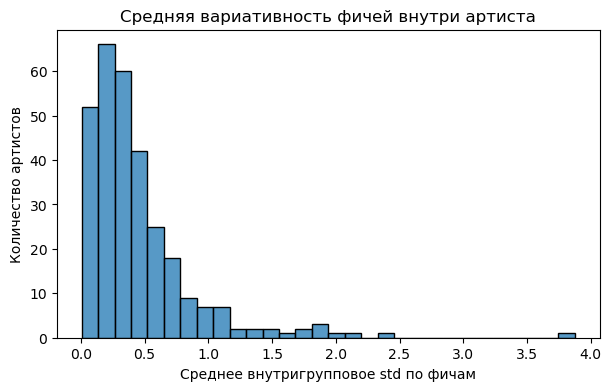

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

artist_var = df_scaled[scaled_cols].groupby(df["artist_name"]).var().mean(axis=1)
plt.figure(figsize=(7,4))
sns.histplot(artist_var, bins=30)
plt.title("Средняя вариативность фичей внутри артиста")
plt.xlabel("Среднее внутригрупповое std по фичам")
plt.ylabel("Количество артистов")
plt.show()

#### В большинстве своем, признаки треков одного артиста не сильно отличаются. Можно предположить, что если пользователю понравился один трек артисто, значит с большой долей вероятности понравится и другой

#### Зависимость успеха трека от количества жанров в нем

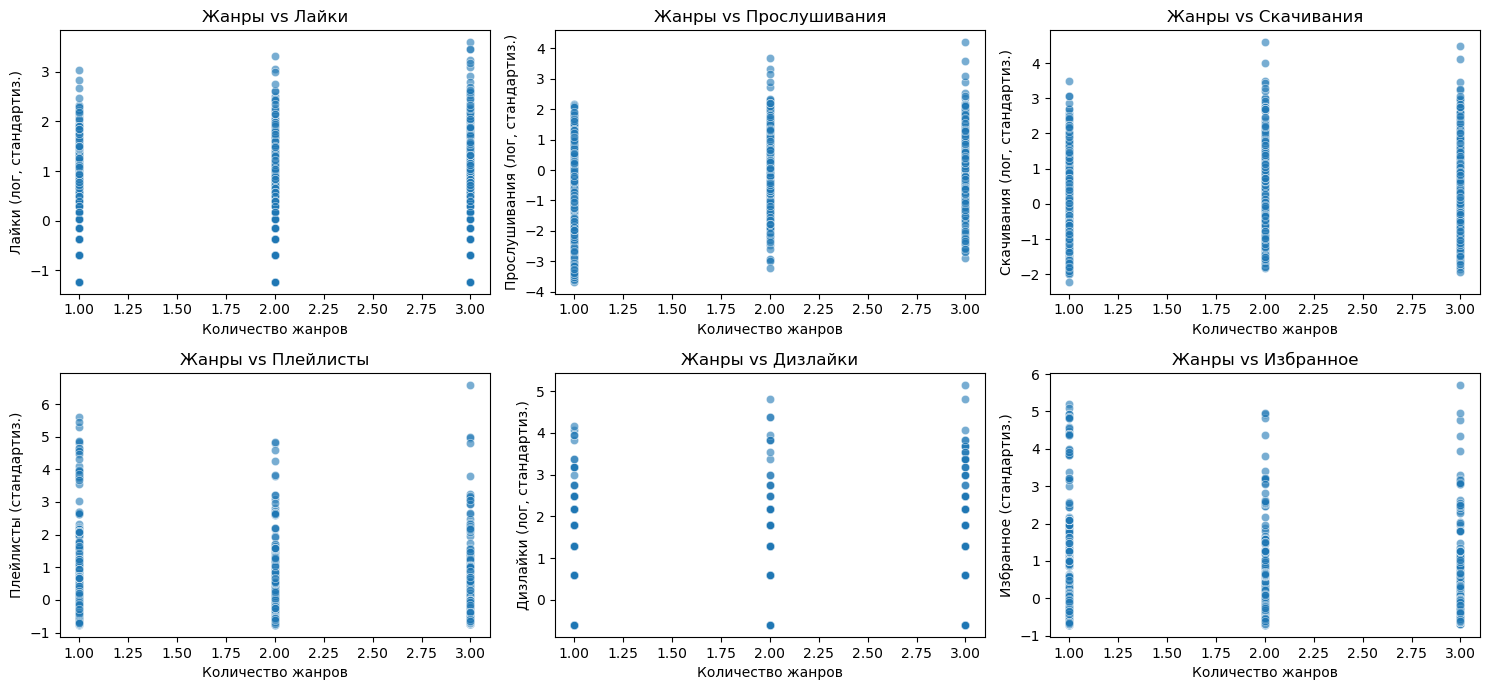

In [271]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.scatterplot(
    data=df_tags,
    x="genres_count",
    y=df_scaled["likes_log_scaled"],
    alpha=0.6
)
plt.title("Жанры vs Лайки")
plt.xlabel("Количество жанров")
plt.ylabel("Лайки (лог, стандартиз.)")

plt.subplot(3, 3, 2)
sns.scatterplot(
    data=df_tags,
    x="genres_count",
    y=df_scaled["rate_listened_total_log_scaled"],
    alpha=0.6
)
plt.title("Жанры vs Прослушивания")
plt.xlabel("Количество жанров")
plt.ylabel("Прослушивания (лог, стандартиз.)")

plt.subplot(3, 3, 3)
sns.scatterplot(
    data=df_tags,
    x="genres_count",
    y=df_scaled["rate_downloads_total_log_scaled"],
    alpha=0.6
)
plt.title("Жанры vs Скачивания")
plt.xlabel("Количество жанров")
plt.ylabel("Скачивания (лог, стандартиз.)")

plt.subplot(3, 3, 4)
sns.scatterplot(
    data=df_tags,
    x="genres_count",
    y=df_scaled["playlisted_scaled"],
    alpha=0.6
)
plt.title("Жанры vs Плейлисты")
plt.xlabel("Количество жанров")
plt.ylabel("Плейлисты (стандартиз.)")

plt.subplot(3, 3, 5)
sns.scatterplot(
    data=df_tags,
    x="genres_count",
    y=df_scaled["dislikes_log_scaled"],
    alpha=0.6
)
plt.title("Жанры vs Дизлайки")
plt.xlabel("Количество жанров")
plt.ylabel("Дизлайки (лог, стандартиз.)")

plt.subplot(3, 3, 6)
sns.scatterplot(
    data=df_tags,
    x="genres_count",
    y=df_scaled["favorited_scaled"],
    alpha=0.6
)
plt.title("Жанры vs Избранное")
plt.xlabel("Количество жанров")
plt.ylabel("Избранное (стандартиз.)")

plt.tight_layout()
plt.show()


#### Можно заметить, что большее количество жанров влечет большее количество прослушиваний

#### Зависимость успеха трека от скорости

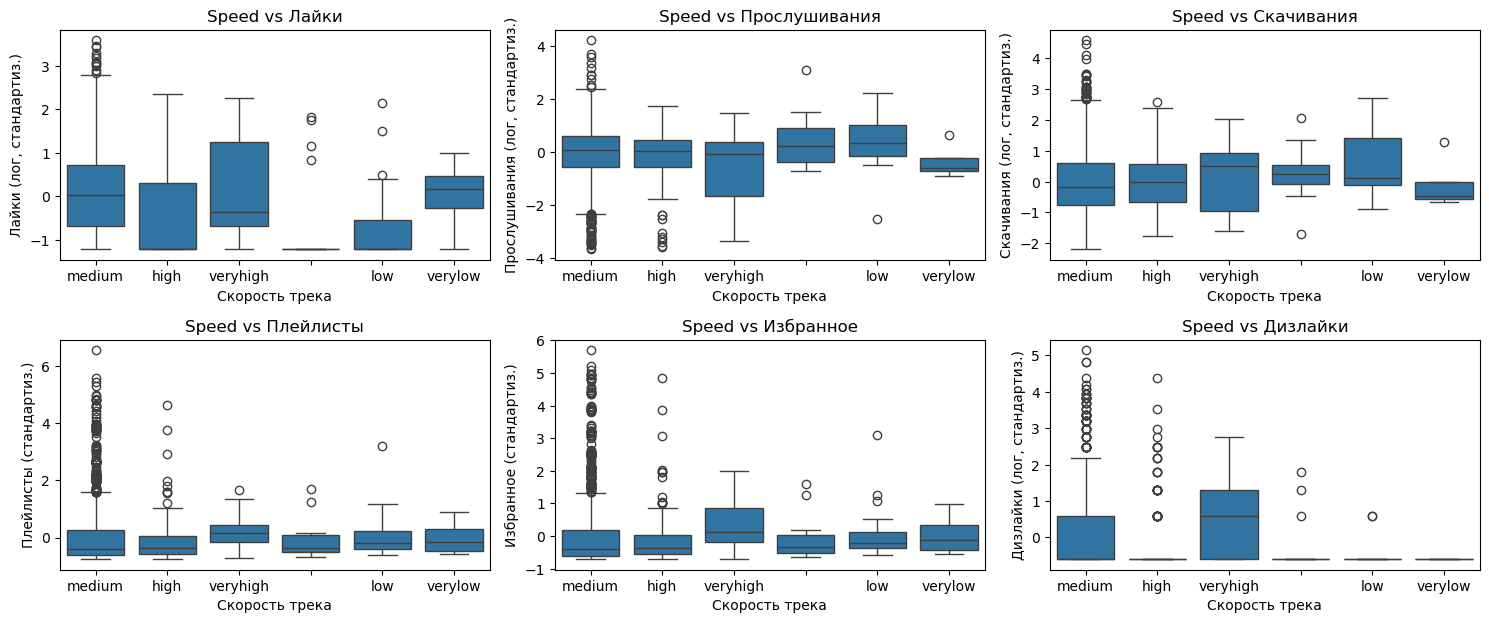

In [290]:
df_merged = pd.merge(
    df[["id", "speed", "lang"]],
    df_scaled[["id", "likes_log_scaled", "rate_listened_total_log_scaled", "rate_downloads_total_log_scaled", "playlisted_scaled", "favorited_scaled", "dislikes_log_scaled"]],
    on="id",
    how="inner"
)
plt.figure(figsize=(15, 9))

plt.subplot(3, 3, 1)
sns.boxplot(
    data=df_merged,
    x="speed",
    y="likes_log_scaled"
)
plt.title("Speed vs Лайки")
plt.xlabel("Скорость трека")
plt.ylabel("Лайки (лог, стандартиз.)")

plt.subplot(3, 3, 2)
sns.boxplot(
    data=df_merged,
    x="speed",
    y="rate_listened_total_log_scaled"
)
plt.title("Speed vs Прослушивания")
plt.xlabel("Скорость трека")
plt.ylabel("Прослушивания (лог, стандартиз.)")

plt.subplot(3, 3, 3)
sns.boxplot(
    data=df_merged,
    x="speed",
    y="rate_downloads_total_log_scaled"
)
plt.title("Speed vs Скачивания")
plt.xlabel("Скорость трека")
plt.ylabel("Скачивания (лог, стандартиз.)")

plt.subplot(3, 3, 4)
sns.boxplot(
    data=df_merged,
    x="speed",
    y="playlisted_scaled"
)
plt.title("Speed vs Плейлисты")
plt.xlabel("Скорость трека")
plt.ylabel("Плейлисты (стандартиз.)")

plt.subplot(3, 3, 5)
sns.boxplot(
    data=df_merged,
    x="speed",
    y="favorited_scaled"
)
plt.title("Speed vs Избранное")
plt.xlabel("Скорость трека")
plt.ylabel("Избранное (стандартиз.)")

plt.subplot(3, 3, 6)
sns.boxplot(
    data=df_merged,
    x="speed",
    y="dislikes_log_scaled"
)
plt.title("Speed vs Дизлайки")
plt.xlabel("Скорость трека")
plt.ylabel("Дизлайки (лог, стандартиз.)")

plt.tight_layout()
plt.show()


#### Явных зависимостей не обнаружено

#### Зависимость успеха трека от языка

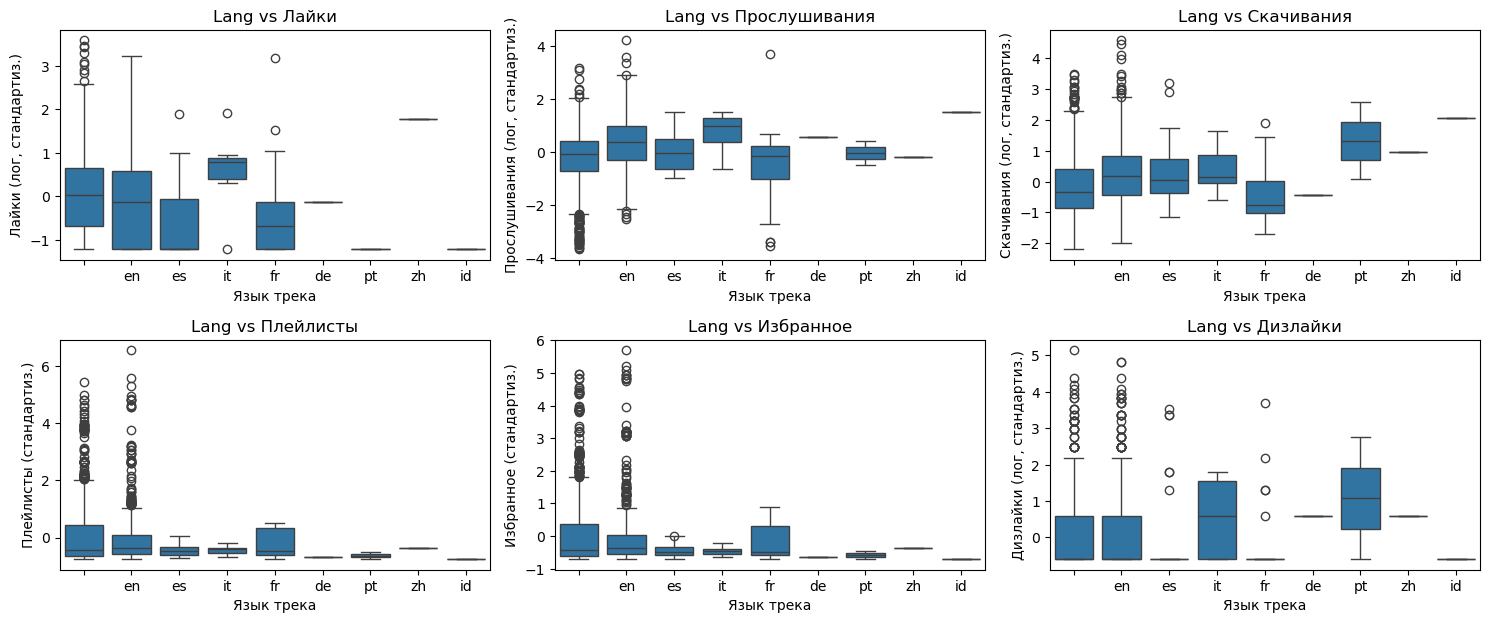

In [292]:
plt.figure(figsize=(15, 9))

plt.subplot(3, 3, 1)
sns.boxplot(
    data=df_merged,
    x="lang",
    y="likes_log_scaled"
)
plt.title("Lang vs Лайки")
plt.xlabel("Язык трека")
plt.ylabel("Лайки (лог, стандартиз.)")

plt.subplot(3, 3, 2)
sns.boxplot(
    data=df_merged,
    x="lang",
    y="rate_listened_total_log_scaled"
)
plt.title("Lang vs Прослушивания")
plt.xlabel("Язык трека")
plt.ylabel("Прослушивания (лог, стандартиз.)")

plt.subplot(3, 3, 3)
sns.boxplot(
    data=df_merged,
    x="lang",
    y="rate_downloads_total_log_scaled"
)
plt.title("Lang vs Скачивания")
plt.xlabel("Язык трека")
plt.ylabel("Скачивания (лог, стандартиз.)")

plt.subplot(3, 3, 4)
sns.boxplot(
    data=df_merged,
    x="lang",
    y="playlisted_scaled"
)
plt.title("Lang vs Плейлисты")
plt.xlabel("Язык трека")
plt.ylabel("Плейлисты (стандартиз.)")

plt.subplot(3, 3, 5)
sns.boxplot(
    data=df_merged,
    x="lang",
    y="favorited_scaled"
)
plt.title("Lang vs Избранное")
plt.xlabel("Язык трека")
plt.ylabel("Избранное (стандартиз.)")

plt.subplot(3, 3, 6)
sns.boxplot(
    data=df_merged,
    x="lang",
    y="dislikes_log_scaled"
)
plt.title("Lang vs Дизлайки")
plt.xlabel("Язык трека")
plt.ylabel("Дизлайки (лог, стандартиз.)")

plt.tight_layout()
plt.show()

#### Явных зависимостей не обнаружено